### import the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, balanced_accuracy_score, precision_score

### dataset 

In [2]:
data= pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### exploring the dataset

In [3]:
data.shape

(569, 32)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### data visualization

In [9]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='Count'>

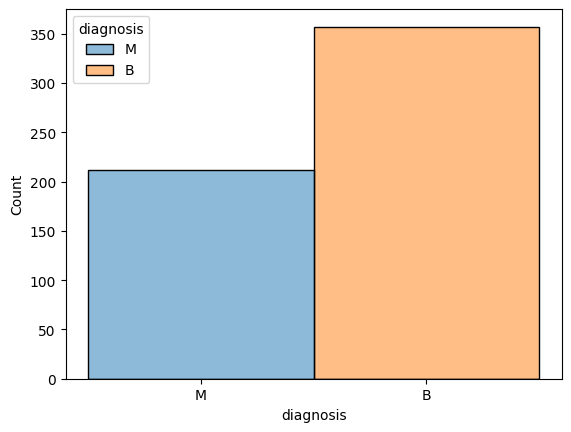

In [10]:
sns.histplot(data= data, x= "diagnosis", hue= "diagnosis")

In [12]:
data.groupby(["diagnosis"]).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [13]:
data_mean= data[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"]]

In [14]:
data_se= data[["radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"]]

In [15]:
data_worst= data[["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]

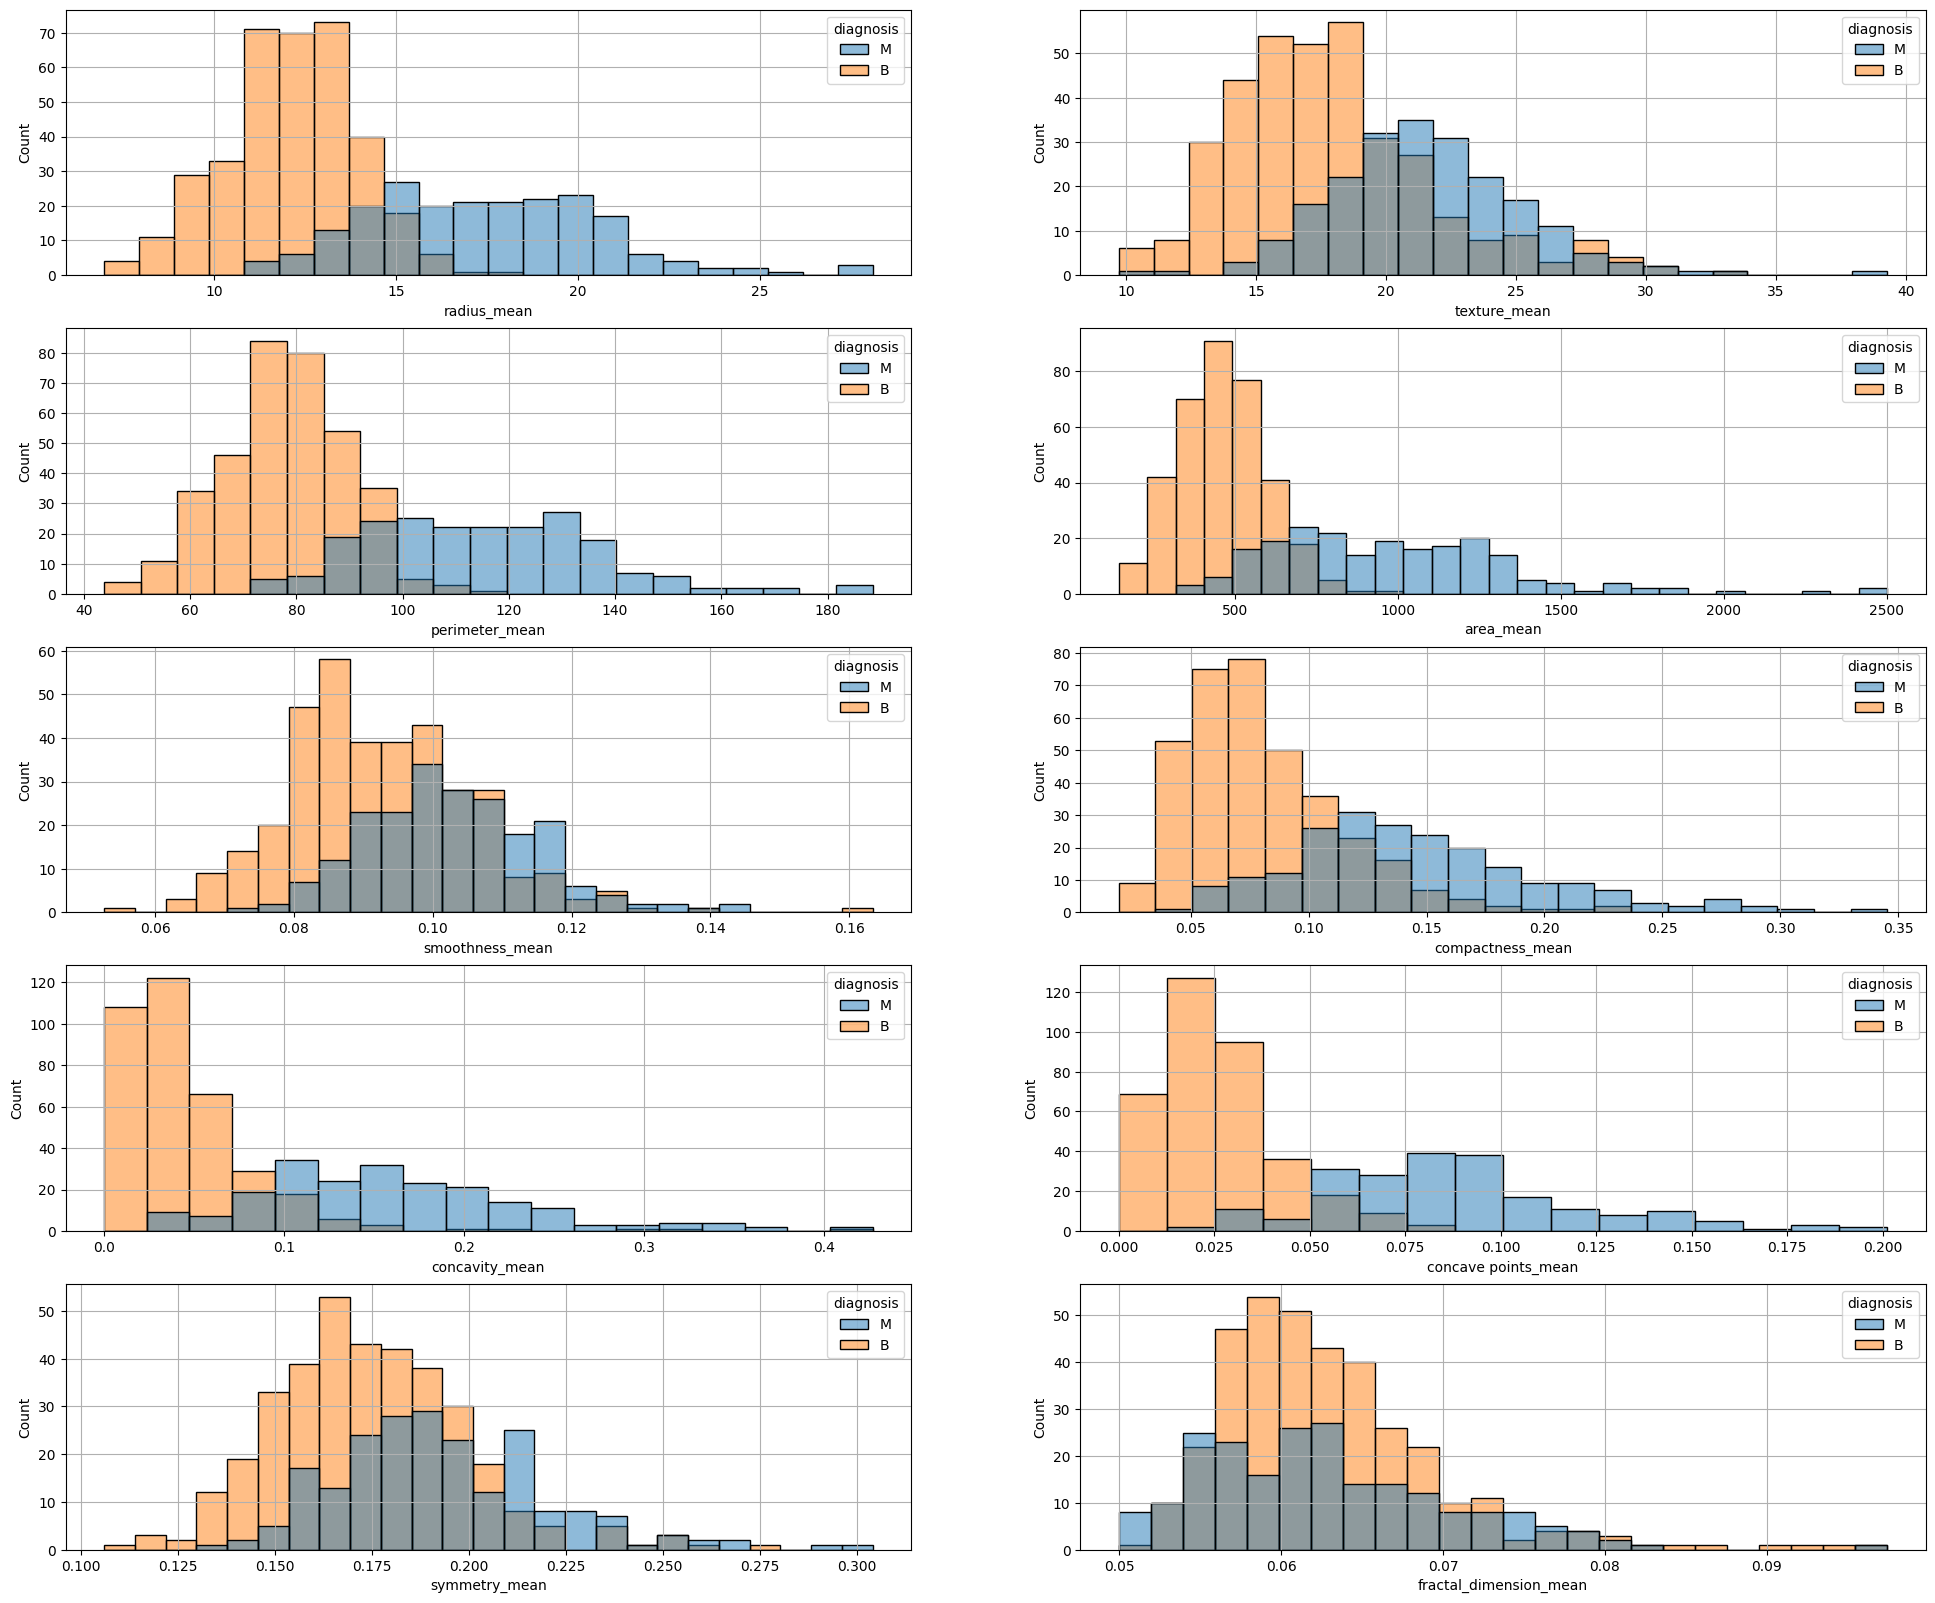

In [16]:
plt.figure(figsize= (24, 20))
n= len(data_mean)
    
for i, j in zip(data_mean, range(1, n+1)) :
    plt.subplot(5, 2, j)
    sns.histplot(data= data, x= i, hue= "diagnosis").grid(True)


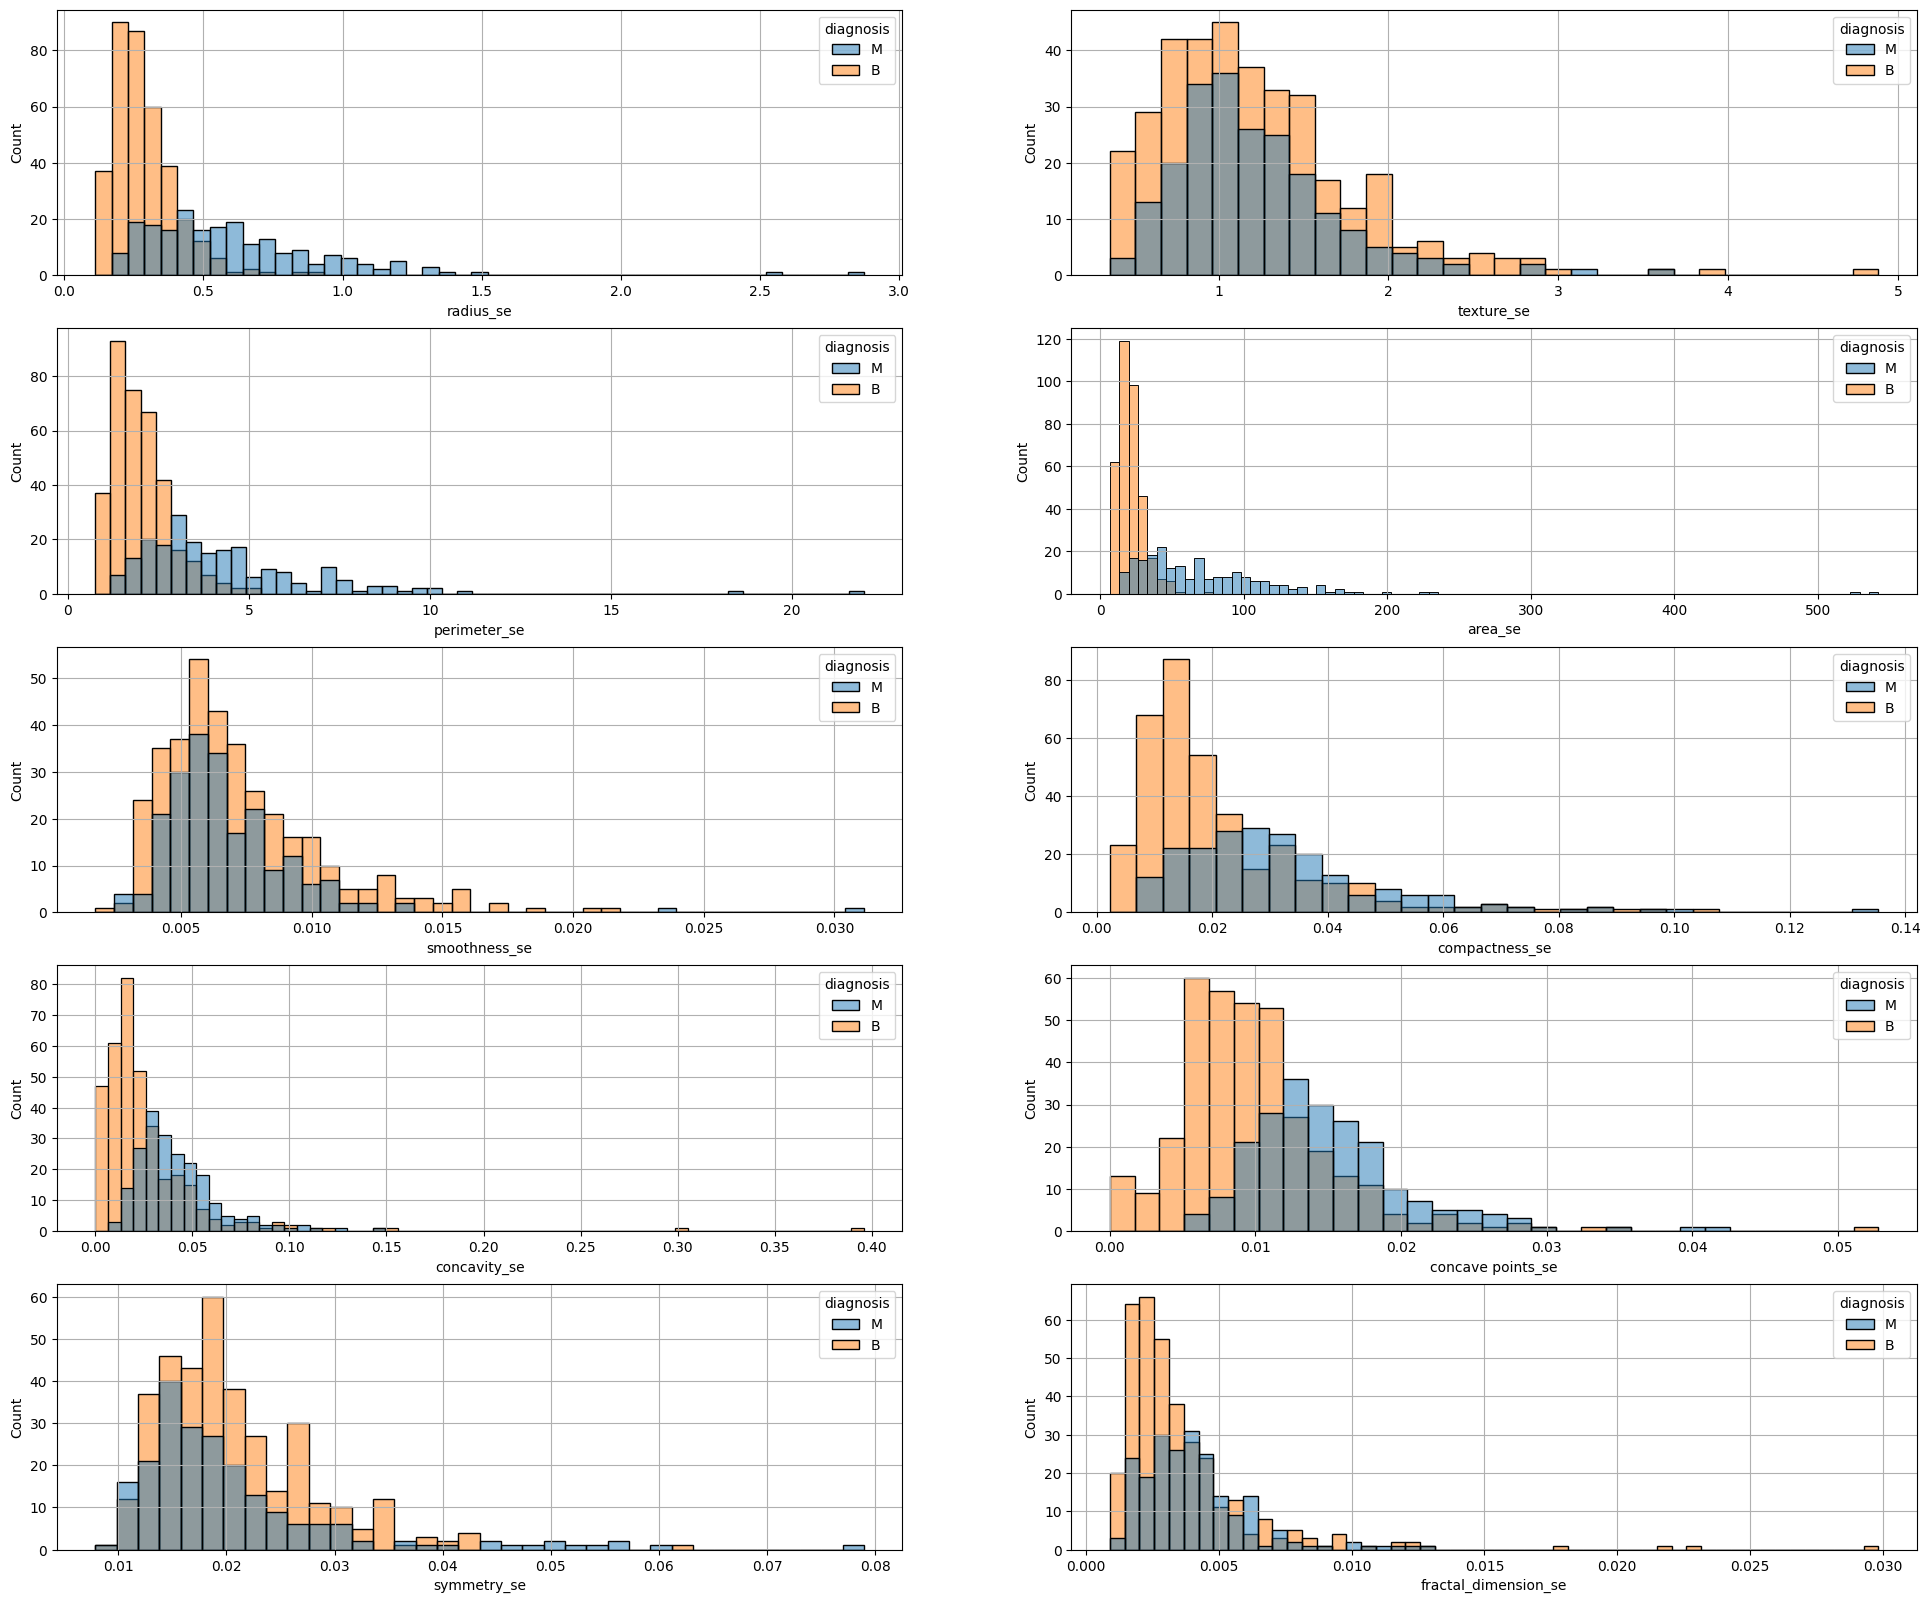

In [17]:
plt.figure(figsize= (24, 20))
n= len(data_se)
    
for i, j in zip(data_se, range(1, n+1)) :
    plt.subplot(5, 2, j)
    sns.histplot(data= data, x= i, hue= "diagnosis").grid(True)


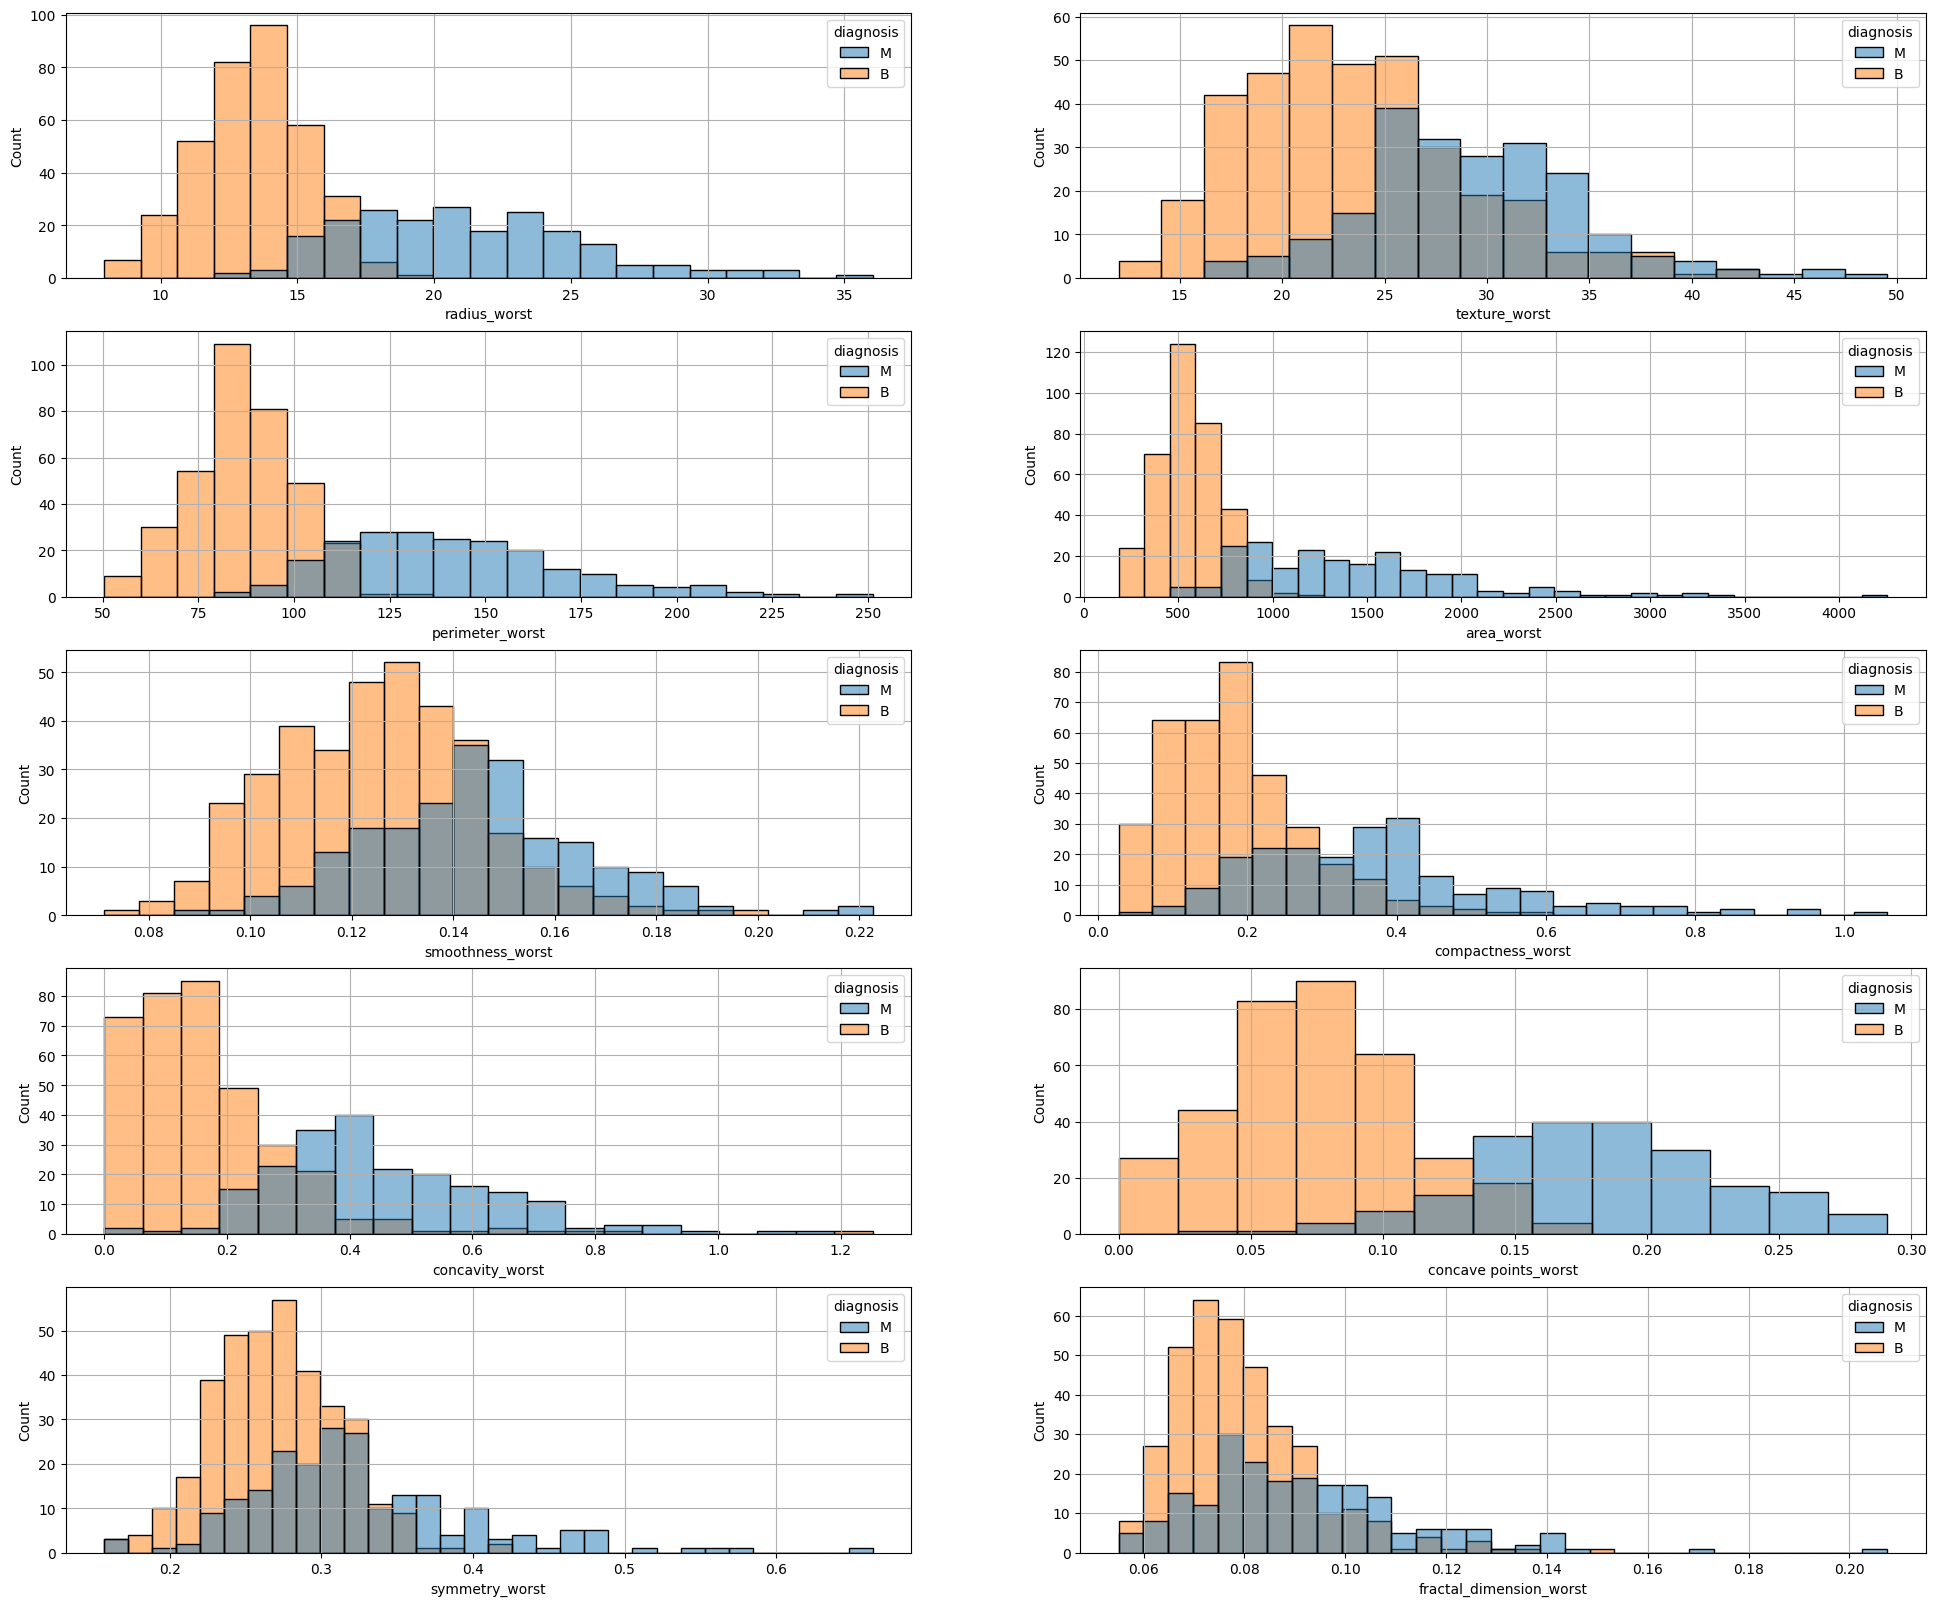

In [18]:
plt.figure(figsize= (24, 20))
n= len(data_worst)
    
for i, j in zip(data_worst, range(1, n+1)) :
    plt.subplot(5, 2, j)
    sns.histplot(data= data, x= i, hue= "diagnosis").grid(True)

### data preprocessing

In [19]:
# replace malignant with 0 and benign with 1
data["diagnosis"].replace(["M", "B"], [0, 1], inplace= True)

In [20]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


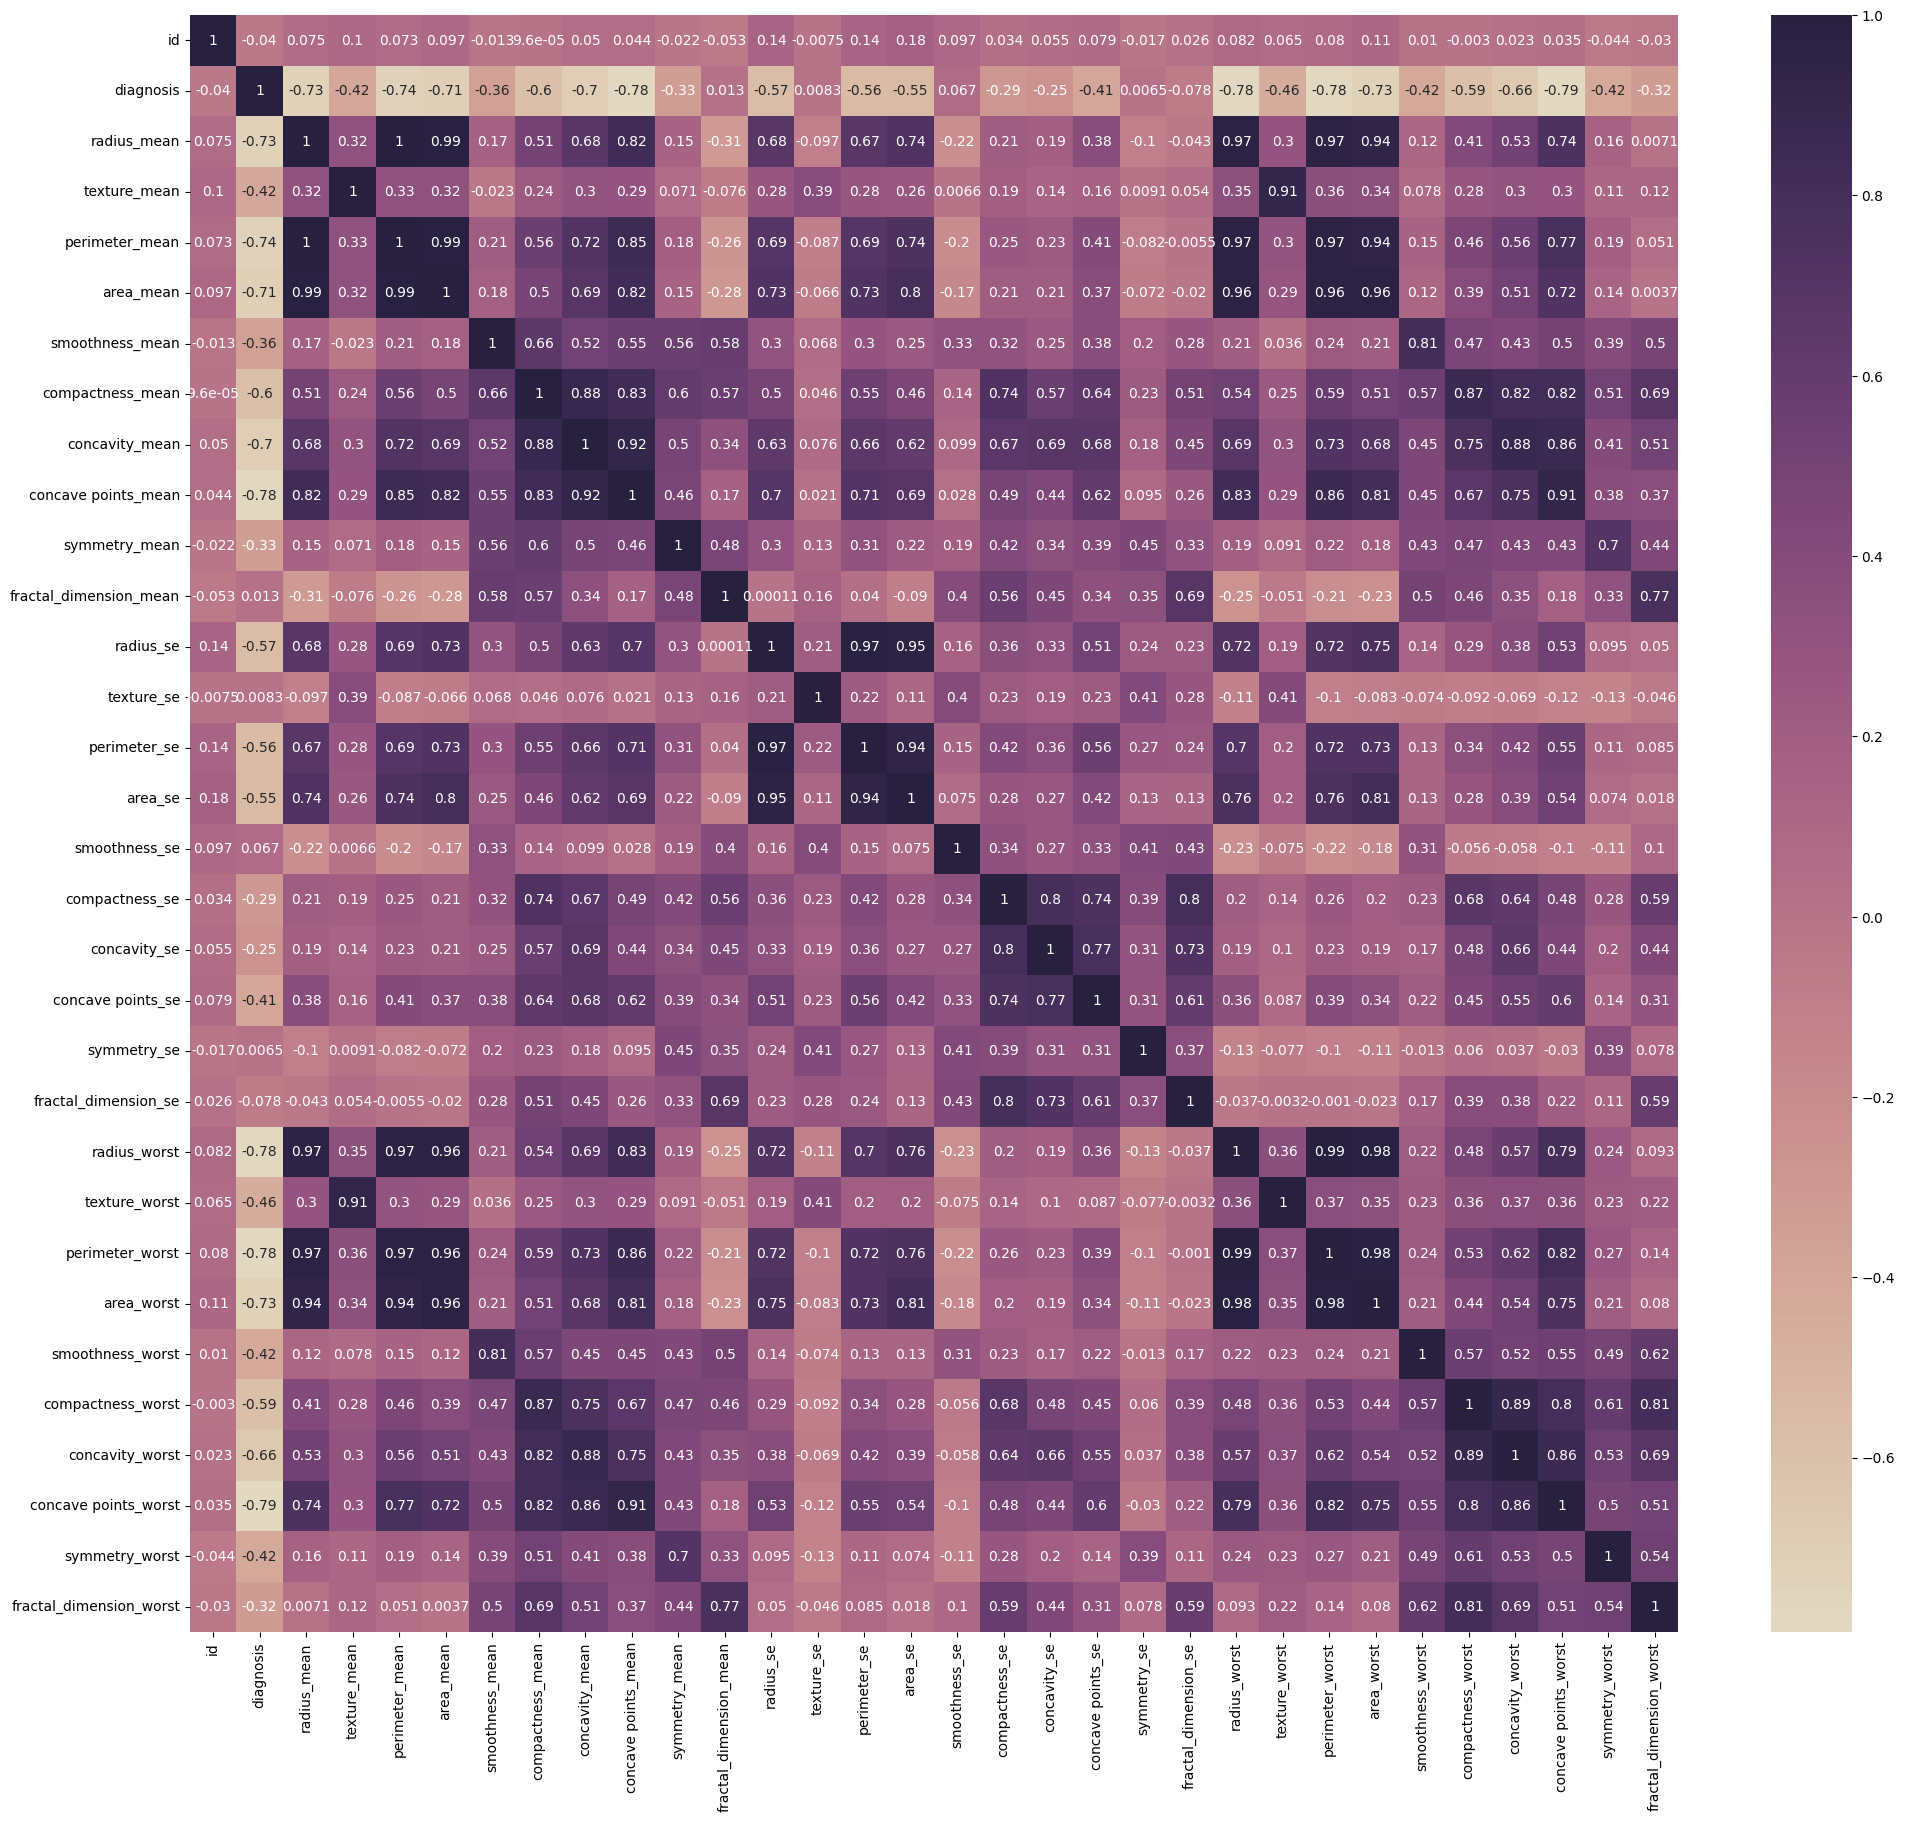

In [21]:
plt.figure(figsize= (24, 21))
sns.heatmap(data.corr(), cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), annot= True)
plt.show()

### split the data

In [22]:
x= data[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]] 

In [23]:
y= data["diagnosis"]

In [24]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3)

In [25]:
print(x_train.shape, x_test.shape)

(398, 30) (171, 30)


In [26]:
print(y_train.shape, y_test.shape)

(398,) (171,)


### data standardization

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler= StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train_standardized= scaler.transform(x_train)

In [30]:
x_test_standardized= scaler.transform(x_test)

### data evaluation 

In [32]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    
    model.fit(x_train, y_train)
    prediction= model.predict(x_test)
    
    accuracy= accuracy_score(y_test, prediction)
    f1= f1_score(y_test, prediction)
    precision= precision_score(y_test, prediction)
    recall= recall_score(y_test, prediction)
    balanced_accuracy = balanced_accuracy_score(y_test, prediction)
    
    evaluation_tab= pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return evaluation_tab


### using different models

#### 1) K-nearest-neighbor

In [33]:
knn= KNeighborsClassifier()

In [34]:
results= evaluate_model(knn, x_train_standardized, x_test_standardized, y_train, y_test)

In [35]:
results.index= ["KNeighborsClassifier"]

In [36]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
KNeighborsClassifier,0.953216,0.960784,0.942308,0.98,0.947746


#### 2) LogisticRegression

In [37]:
lg= LogisticRegression()

In [38]:
logistic_regression_result=  evaluate_model(lg, x_train_standardized, x_test_standardized, y_train, y_test)

In [39]:
results= pd.concat([results, logistic_regression_result], ignore_index = True)

In [40]:
results.index= ["KNeighborsClassifier", "LogisticRegression"]

In [41]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
KNeighborsClassifier,0.953216,0.960784,0.942308,0.98,0.947746
LogisticRegression,0.976608,0.980392,0.961538,1.00,0.971831


#### 3) support vector machine

In [42]:
svm= SVC()

In [43]:
svm_result= evaluate_model(svm, x_train_standardized, x_test_standardized, y_train, y_test)

In [47]:
results= pd.concat([results, svm_result], ignore_index = True)

In [49]:
results.index= ["KNeighborsClassifier", "LogisticRegression", "SVC"]

In [50]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
KNeighborsClassifier,0.953216,0.960784,0.942308,0.98,0.947746
LogisticRegression,0.976608,0.980392,0.961538,1.00,0.971831
SVC,0.976608,0.980198,0.970588,0.99,0.973873


#### 4) RandomForestClassifier

In [52]:
rfc= RandomForestClassifier()

In [53]:
rfc_result= evaluate_model(rfc, x_train_standardized, x_test_standardized, y_train, y_test)

In [54]:
results= pd.concat([results, rfc_result], ignore_index = True)

In [55]:
results.index= ["KNeighborsClassifier", "LogisticRegression", "SVC", "RandomForestClassifier"]

In [56]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
KNeighborsClassifier,0.953216,0.960784,0.942308,0.98,0.947746
LogisticRegression,0.976608,0.980392,0.961538,1.00,0.971831
SVC,0.976608,0.980198,0.970588,0.99,0.973873
RandomForestClassifier,0.959064,0.965174,0.960396,0.97,0.956831


### conclusion

In [65]:
results.shape

(4, 5)

In [58]:
results.columns

Index(['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'], dtype='object')

In [60]:
results.dtypes

accuracy             float64
f1_score             float64
precision            float64
recall               float64
balanced_accuracy    float64
dtype: object

1) the support vector machine and logistic regression algorithms performs better than other algorithms in term of accuracy, f1 score, balanced_accuracy and recall
2) in term of precession they perform similarly except KNN algorithm
3) for better results, it's suggested to work with either SVM or LogisticRegression	